In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("datos/paises_vida.csv", index_col="index")
df = df.dropna()
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
index,,,,,,,,
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716


In [3]:
df = df[df["continent"] == "Africa"]
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
index,,,,,,,,
24,Algeria,Africa,1952,43.077,9279525,2449.008185,DZA,12
25,Algeria,Africa,1957,45.685,10270856,3013.976023,DZA,12
26,Algeria,Africa,1962,48.303,11000948,2550.816880,DZA,12
27,Algeria,Africa,1967,51.407,12760499,3246.991771,DZA,12
28,Algeria,Africa,1972,54.518,14760787,4182.663766,DZA,12
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716


In [4]:
df_agrupado = df.groupby("year").agg({
    "lifeExp": "mean",
    "pop": "sum",
    "gdpPercap" : "mean"
})

df_agrupado = df_agrupado.reset_index()
df_agrupado

,year,lifeExp,pop,gdpPercap
0,1952,39.135500,237640501,1252.572466
1,1957,41.266346,264837738,1385.236062
2,1962,43.319442,296516865,1598.078825
3,1967,45.334538,335289489,2050.363801
4,1972,47.450942,379879541,2339.615674
5,1977,49.580423,433061021,2585.938508
6,1982,51.592865,499348587,2481.592960
7,1987,53.344788,574834110,2282.668991
8,1992,53.629577,659081517,2281.810333
9,1997,53.598269,743832984,2378.759555


<Axes: xlabel='year', ylabel='lifeExp'>

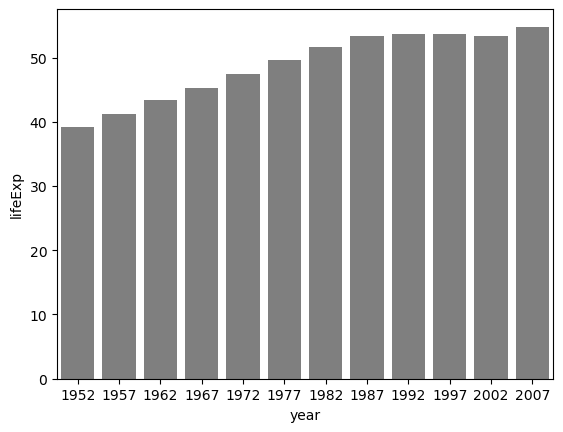

In [7]:
sns.barplot(
    data=df_agrupado,
    x="year",
    y="lifeExp",
    color="tab:grey"
)

<Axes: ylabel='gdpPercap'>

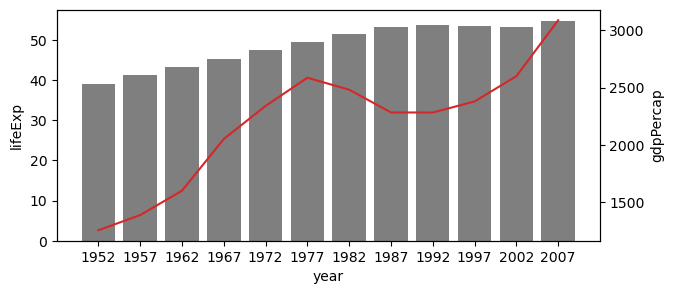

In [10]:
fig, ax1 = plt.subplots(
    figsize=(7, 3)
)

ax2 = ax1.twinx()


sns.barplot(
    data=df_agrupado,
    x="year",
    y="lifeExp",
    color="tab:grey",
    ax=ax1
)

sns.lineplot(
    data=df_agrupado["gdpPercap"],
    color="tab:red",
    ax=ax2
)

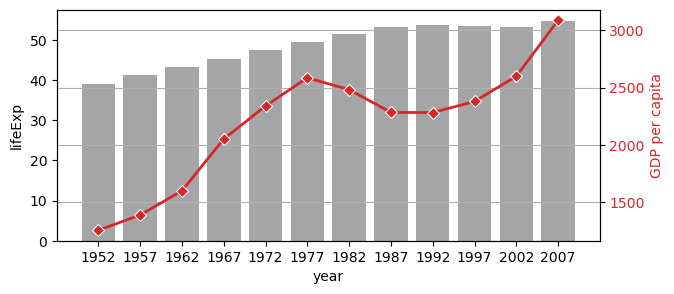

In [14]:
fig, ax1 = plt.subplots(
    figsize=(7, 3)
)

ax2 = ax1.twinx()


sns.barplot(
    data=df_agrupado,
    x="year",
    y="lifeExp",
    color="tab:grey",
    ax=ax1,
    alpha=0.7
)

sns.lineplot(
    data=df_agrupado["gdpPercap"],
    color="tab:red",
    ax=ax2,
    linewidth=2,
    marker="D"
)

ax2.tick_params(axis="y", labelcolor="tab:red")
ax2.set_ylabel("GDP per capita", color="tab:red")
ax2.grid(visible=True)